In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Load interpolated data from data_interpolation
data_0 = pd.read_csv('../data_interpolation/data_interpolated_by_nearest_year_and province.csv')

data_0

,province,year,age_group,method,myopia_rate_urban,myopia_rate_rural
0,Anhui,1998,1,NaN,0.088755,0.054200
1,Anhui,1999,1,NaN,0.084968,0.130392
2,Anhui,2000,1,1 or 3,0.064205,0.129624
3,Anhui,2001,1,NaN,0.084233,0.128975
4,Anhui,2002,1,NaN,0.105731,0.147738
...,...,...,...,...,...,...
3095,Zhejiang,2018,4,1 or 3,0.851666,0.695790
3096,Zhejiang,2019,4,1 or 3,0.862468,0.789092
3097,Zhejiang,2020,4,1 or 3,0.896991,0.741244
3098,Zhejiang,2021,4,NaN,0.875019,0.727354


In [3]:
province_mapping = {
    '北京': 'Beijing',  '天津': 'Tianjin', '河北': 'Hebei',  '山西': 'Shanxi',  '内蒙古': 'Inner Mongolia',
    '辽宁': 'Liaoning', '吉林': 'Jilin',  '黑龙江': 'Heilongjiang',
    '上海': 'Shanghai', '江苏': 'Jiangsu',  '浙江': 'Zhejiang',  '安徽': 'Anhui',  '福建': 'Fujian',  '江西': 'Jiangxi',  '山东': 'Shandong',
    '河南': 'Henan', '湖北': 'Hubei', '湖南': 'Hunan',
    '广东': 'Guangdong',  '广西': 'Guangxi',  '海南': 'Hainan',
    '重庆': 'Chongqing',  '四川': 'Sichuan',  '贵州': 'Guizhou','云南': 'Yunnan', '西藏': 'Tibet',
    '陕西': 'Shaanxi', '甘肃': 'Gansu',  '青海': 'Qinghai',  '宁夏': 'Ningxia', '新疆': 'Xinjiang'
}

In [4]:
# Read age weight from National Bureau of Statistics' Yearbook.
folder_path = '../data/weight/weight_age'

# 获取文件夹内所有文件的列表
file_list = os.listdir(folder_path)
dfs = {}
# 遍历文件列表
for file_name in file_list:
    print(file_name)
    if file_name.endswith('.csv'):
        # 构建文件的完整路径
        file_path = os.path.join(folder_path, file_name)
        
        # 读取 CSV 文件，并存储到同名的 DataFrame 中
        df_name = file_name[:-4]  # 去除文件名的后缀 '.csv'
        dfs[df_name] = pd.read_csv(file_path, nrows=31)
        dfs[df_name]['province'] = dfs[df_name]['province'].map(province_mapping)
        dfs[df_name] = dfs[df_name].set_index(dfs[df_name].columns[0])

# Read province weight from National Bureau of Statistics' Yearbook.
weight_u_r = pd.read_csv('../data/weight/weight_u_r.csv', nrows=31)
weight_u_r['province'] = weight_u_r['province'].map(province_mapping)
weight_u_r = weight_u_r.set_index(weight_u_r.columns[0])

2020_rural.csv
2000_rural.csv
2020_urban.csv
2000_urban.csv
2010_urban.csv
2010_rural.csv


In [5]:
weight_u_r.loc['Beijing',] = 1
weight_u_r.loc['Shanghai',] = 1
weight_u_r

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
province,,,,,,,,,,,,,,,,,,,,,
Beijing,1.000000,1.000000,1.0000,1.0000,1.0000,1.0000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Tianjin,0.708300,0.711700,0.7122,0.7141,0.7183,0.7202,0.726564,0.732838,0.739019,0.745106,...,0.8229,0.8255,0.8288,0.8327,0.8357,0.8395,0.8431,0.8470,0.8488,0.8511
Hebei,0.227700,0.241900,0.2478,0.2517,0.2551,0.2622,0.283293,0.305380,0.328400,0.352275,...,0.4802,0.4936,0.5167,0.5387,0.5574,0.5733,0.5877,0.6007,0.6114,0.6165
Shanxi,0.323700,0.332000,0.3374,0.3410,0.3451,0.3506,0.364290,0.378204,0.392321,0.406620,...,0.5288,0.5430,0.5587,0.5727,0.5859,0.5985,0.6129,0.6253,0.6342,0.6396
Inner Mongolia,0.387100,0.392600,0.3992,0.4056,0.4121,0.4282,0.436893,0.445624,0.454390,0.463183,...,0.5982,0.6097,0.6209,0.6340,0.6460,0.6551,0.6646,0.6748,0.6821,0.6860
Liaoning,0.529500,0.533000,0.5366,0.5397,0.5415,0.5435,0.552275,0.561018,0.569723,0.578386,...,0.6645,0.6705,0.6805,0.6887,0.6949,0.7026,0.7121,0.7214,0.7281,0.7300
Jilin,0.498500,0.497800,0.5001,0.4996,0.4978,0.4977,0.503204,0.508708,0.514209,0.519707,...,0.5574,0.5681,0.5764,0.5875,0.5971,0.6085,0.6163,0.6264,0.6336,0.6372
Heilongjiang,0.505700,0.510700,0.5067,0.5123,0.5139,0.5164,0.519323,0.522245,0.525165,0.528083,...,0.5804,0.5922,0.6047,0.6109,0.6190,0.6346,0.6462,0.6561,0.6569,0.6621
Shanghai,1.000000,1.000000,1.0000,1.0000,1.0000,1.0000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [6]:
def weight_matching(df):
    df['population_urban'] = 0
    df['population_urban'] = 0
    df['weight'] = 0
    for index,row in df.iterrows():
        pvc = row['province']
        age_group = str(row['age_group'])
        year = row['year']
        if year <= 2005:
            year_index = 2000
        elif year <= 2015:
            year_index = 2010
        else:
            year_index = 2020
        df_name_urban = "{}_urban".format(year_index)
        df_name_rural = "{}_rural".format(year_index)
        df.loc[index, 'population_urban'] = dfs[df_name_urban].loc[pvc, age_group]
        df.loc[index, 'population_rural'] = dfs[df_name_rural].loc[pvc, age_group]
        df.loc[index, 'weight'] = weight_u_r.loc[pvc, str(year)]
    
    return df


In [7]:
df_province = weight_matching(data_0)
df_province

/tmp/ipykernel_45681/1550552698.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.267' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'weight'] = weight_u_r.loc[pvc, str(year)]


,province,year,age_group,method,myopia_rate_urban,myopia_rate_rural,population_urban,weight,population_rural
0,Anhui,1998,1,NaN,0.088755,0.054200,1124729,0.267000,4092013.0
1,Anhui,1999,1,NaN,0.084968,0.130392,1124729,0.276800,4092013.0
2,Anhui,2000,1,1 or 3,0.064205,0.129624,1124729,0.279600,4092013.0
3,Anhui,2001,1,NaN,0.084233,0.128975,1124729,0.293886,4092013.0
4,Anhui,2002,1,NaN,0.105731,0.147738,1124729,0.308590,4092013.0
...,...,...,...,...,...,...,...,...,...
3095,Zhejiang,2018,4,1 or 3,0.851666,0.695790,2339204,0.700200,469946.0
3096,Zhejiang,2019,4,1 or 3,0.862468,0.789092,2339204,0.715800,469946.0
3097,Zhejiang,2020,4,1 or 3,0.896991,0.741244,2339204,0.721700,469946.0
3098,Zhejiang,2021,4,NaN,0.875019,0.727354,2339204,0.726600,469946.0


In [8]:
df_province['rate'] =  df_province['myopia_rate_urban'] * df_province['weight'] + df_province['myopia_rate_rural'] * (1 - df_province['weight'])
df_province['population'] = df_province['population_urban'] + df_province['population_rural']
df_province

,province,year,age_group,method,myopia_rate_urban,myopia_rate_rural,population_urban,weight,population_rural,rate,population
0,Anhui,1998,1,NaN,0.088755,0.054200,1124729,0.267000,4092013.0,0.063426,5216742.0
1,Anhui,1999,1,NaN,0.084968,0.130392,1124729,0.276800,4092013.0,0.117819,5216742.0
2,Anhui,2000,1,1 or 3,0.064205,0.129624,1124729,0.279600,4092013.0,0.111333,5216742.0
3,Anhui,2001,1,NaN,0.084233,0.128975,1124729,0.293886,4092013.0,0.115825,5216742.0
4,Anhui,2002,1,NaN,0.105731,0.147738,1124729,0.308590,4092013.0,0.134775,5216742.0
...,...,...,...,...,...,...,...,...,...,...,...
3095,Zhejiang,2018,4,1 or 3,0.851666,0.695790,2339204,0.700200,469946.0,0.804934,2809150.0
3096,Zhejiang,2019,4,1 or 3,0.862468,0.789092,2339204,0.715800,469946.0,0.841614,2809150.0
3097,Zhejiang,2020,4,1 or 3,0.896991,0.741244,2339204,0.721700,469946.0,0.853647,2809150.0
3098,Zhejiang,2021,4,NaN,0.875019,0.727354,2339204,0.726600,469946.0,0.834647,2809150.0


### 不同省市、分年龄段、不分城乡的数据

In [9]:
df_rate_province_age = df_province.loc[:, ['province', 'year', 'age_group', 'rate', 'population']]
# 各省份不分年龄段，分城乡数据
df_rate_province_age.to_csv('./rate_province_age.csv')
df_rate_province_age

,province,year,age_group,rate,population
0,Anhui,1998,1,0.063426,5216742.0
1,Anhui,1999,1,0.117819,5216742.0
2,Anhui,2000,1,0.111333,5216742.0
3,Anhui,2001,1,0.115825,5216742.0
4,Anhui,2002,1,0.134775,5216742.0
...,...,...,...,...,...
3095,Zhejiang,2018,4,0.804934,2809150.0
3096,Zhejiang,2019,4,0.841614,2809150.0
3097,Zhejiang,2020,4,0.853647,2809150.0
3098,Zhejiang,2021,4,0.834647,2809150.0


### 不同省市、不分年龄段、但是分城乡的数据

In [10]:
def weighted_rate(group):
    """
    计算加权近视率
    """
    return (group['myopia_rate_urban'] * group['population_urban']).sum() / group['population_urban'].sum(), (group['myopia_rate_rural'] * group['population_rural']).sum() / group['population_rural'].sum(), group['population_urban'].sum(), group['population_rural'].sum(), group['weight'].mean()
       
    

In [11]:
df_rate = df_province.groupby(['year', 'province']).apply(weighted_rate)
df_rate_province_u_r = df_rate.to_frame()
df_rate_province_u_r[['myopia_rate_urban', 'myopia_rate_rural', 'population_urban', 'population_rural', 'weight']] = df_rate_province_u_r[0].apply(lambda x: pd.Series(x))
df_rate_province_u_r.drop(0, axis=1, inplace=True)
df_rate_province_u_r = df_rate_province_u_r.reset_index()

# 各省份不分年龄段，分城乡数据
mydata = df_rate_province_u_r.loc[:, ['year', 'province', 'myopia_rate_urban', 'myopia_rate_rural']]
mydata.to_csv('./rate_province_urban_and_rural.csv')
mydata

/tmp/ipykernel_45681/2837510812.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = df_province.groupby(['year', 'province']).apply(weighted_rate)


,year,province,myopia_rate_urban,myopia_rate_rural
0,1998,Anhui,0.345684,0.240525
1,1998,Beijing,0.361354,0.261688
2,1998,Chongqing,0.305127,0.216538
3,1998,Fujian,0.364251,0.256065
4,1998,Gansu,0.329512,0.262306
...,...,...,...,...
770,2022,Tianjin,0.609753,0.503246
771,2022,Tibet,0.563384,0.433092
772,2022,Xinjiang,0.537667,0.405699
773,2022,Yunnan,0.576255,0.439433


### 全国性的、不分年龄段、但是分城乡的数据

In [12]:
df_rate = df_rate_province_u_r.groupby(['year']).apply(weighted_rate)
df_rate_country_u_r = df_rate.to_frame()
df_rate_country_u_r[['myopia_rate_urban', 'myopia_rate_rural', 'population_urban', 'population_rural', 'weight']] = df_rate_country_u_r[0].apply(lambda x: pd.Series(x))
df_rate_country_u_r.drop(0, axis=1, inplace=True)
df_rate_country_u_r = df_rate_country_u_r.reset_index()
mydata = df_rate_country_u_r.loc[:, ['year', 'myopia_rate_urban', 'myopia_rate_rural']]
mydata.to_csv('./rate_country_urban_and_rural.csv')

mydata

/tmp/ipykernel_45681/2290496237.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = df_rate_province_u_r.groupby(['year']).apply(weighted_rate)


,year,myopia_rate_urban,myopia_rate_rural
0,1998,0.313502,0.257562
1,1999,0.326925,0.261223
2,2000,0.311736,0.281624
3,2001,0.323335,0.250797
4,2002,0.376052,0.272140
5,2003,0.359417,0.236371
6,2004,0.372585,0.280631
7,2005,0.440782,0.381565
8,2006,0.402379,0.259285
9,2007,0.451337,0.354816


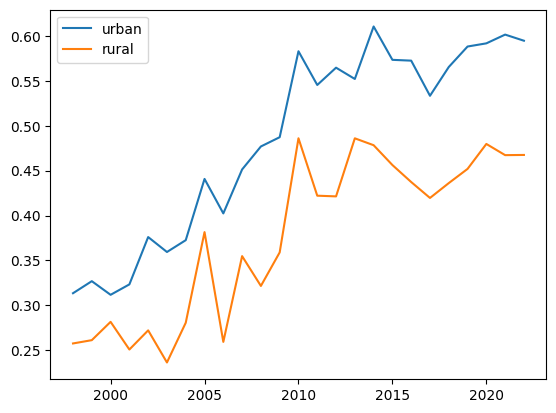

In [13]:
plt.plot(mydata['year'], mydata['myopia_rate_urban'], label='urban')
plt.plot(mydata['year'], mydata['myopia_rate_rural'], label='rural')

plt.legend()
plt.show()

### 省份总的数据

In [14]:
# 计算不同省市不分年龄段不分城乡的数据
df_rate_province_u_r['rate'] = df_rate_province_u_r['myopia_rate_urban'] * df_rate_province_u_r['weight'] + df_rate_province_u_r['myopia_rate_rural'] * (1 - df_rate_province_u_r['weight'])
# 各省份不分年龄段，分城乡数据
mydata = df_rate_province_u_r.loc[:, ['year', 'province', 'rate']]
mydata.to_csv('./rate_province.csv')
mydata

,year,province,rate
0,1998,Anhui,0.268603
1,1998,Beijing,0.361354
2,1998,Chongqing,0.242956
3,1998,Fujian,0.299080
4,1998,Gansu,0.278072
...,...,...,...
770,2022,Tianjin,0.593894
771,2022,Tibet,0.481808
772,2022,Xinjiang,0.482095
773,2022,Yunnan,0.510197


### 全国性的、总的数据

In [15]:
def  region_weight(group):
    '''按人口给省份加权'''
    rate = ((group['population_urban'] + group['population_rural']) * group['rate']).sum()/(group['population_urban'] + group['population_rural']).sum()
    return rate

In [16]:
# 计算不同省市不分年龄段不分城乡的数据
df_rate_province_u_r['rate'] = df_rate_province_u_r['myopia_rate_urban'] * df_rate_province_u_r['weight'] + df_rate_province_u_r['myopia_rate_rural'] * (1 - df_rate_province_u_r['weight'])
df_rate = df_rate_province_u_r.groupby(['year']).apply(region_weight)
df_rate_country = df_rate.to_frame()
df_rate_country['rate'] = df_rate_country[0]
df_rate_country.drop(0, axis=1, inplace=True)
df_rate_country = df_rate_country.reset_index()
df_rate_country.to_csv('./rate_country.csv')

/tmp/ipykernel_45681/378543121.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = df_rate_province_u_r.groupby(['year']).apply(region_weight)


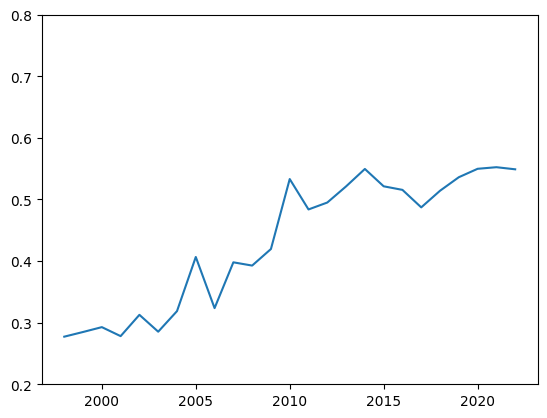

In [17]:
plt.plot(df_rate_country['year'], df_rate_country['rate'])
plt.ylim(0.2, 0.8)
plt.show()

### 全国性的、分年龄段、分城乡的数据

In [18]:
df_rate = df_province.groupby(['year', 'age_group']).apply(weighted_rate)
df_rate_country_age_u_r = df_rate.to_frame()
df_rate_country_age_u_r[['myopia_rate_urban', 'myopia_rate_rural', 'population_urban', 'population_rural', 'weight']] = df_rate_country_age_u_r[0].apply(lambda x: pd.Series(x))
df_rate_country_age_u_r.drop(0, axis=1, inplace=True)
df_rate_country_age_u_r = df_rate_country_age_u_r.reset_index()
mydata = df_rate_country_age_u_r.loc[:, ['year', 'age_group', 'myopia_rate_urban', 'myopia_rate_rural']]
mydata.to_csv('./rate_country_age_urban_and_rural.csv')
mydata

/tmp/ipykernel_45681/4240792985.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = df_province.groupby(['year', 'age_group']).apply(weighted_rate)


,year,age_group,myopia_rate_urban,myopia_rate_rural
0,1998,1,0.112536,0.097834
1,1998,2,0.110117,0.107992
2,1998,3,0.372822,0.418632
3,1998,4,0.562161,0.407604
4,1999,1,0.124524,0.101745
...,...,...,...,...
95,2021,4,0.822595,0.695838
96,2022,1,0.308524,0.208048
97,2022,2,0.612497,0.462101
98,2022,3,0.657001,0.596713


# 全国性的、分年龄段、不分城乡的数据

In [19]:
df_population = df_province.loc[:,["year", "age_group", "population_urban", "population_rural", "population"]]
df_population_rate = df_population.groupby(["year", "age_group"]).sum()
df_population_rate["weight_urban"] = df_population_rate["population_urban"]/df_population_rate["population"]
df_population_rate["weight_rural"] = df_population_rate["population_rural"]/df_population_rate["population"]
df_population_rate.reset_index(inplace=True)
df_population_rate

,year,age_group,population_urban,population_rural,population,weight_urban,weight_rural
0,1998,1,26588363,63564224.0,90152587.0,0.294926,0.705074
1,1998,2,35802884,89593749.0,125396633.0,0.285517,0.714483
2,1998,3,35802884,89593749.0,125396633.0,0.285517,0.714483
3,1998,4,42231585,60799580.0,103031165.0,0.409891,0.590109
4,1999,1,26588363,63564224.0,90152587.0,0.294926,0.705074
...,...,...,...,...,...,...,...
95,2021,4,53173349,19510791.0,72684140.0,0.731567,0.268433
96,2022,1,55538765,34705291.0,90244056.0,0.615429,0.384571
97,2022,2,49758539,35497455.0,85255994.0,0.583637,0.416363
98,2022,3,49758539,35497455.0,85255994.0,0.583637,0.416363


In [20]:
# mydata["myopia_rate_urban"]*df_population_rate["weight_urban"] + mydata["myopia_rate_rural"]*df_population_rate["weight_rural"]

mydata["myopia_rate"] = mydata["myopia_rate_urban"]*df_population_rate["weight_urban"] + mydata["myopia_rate_rural"]*df_population_rate["weight_rural"]
mydata.to_csv('./rate_country_age_urban_rural_all.csv')
mydata

,year,age_group,myopia_rate_urban,myopia_rate_rural,myopia_rate
0,1998,1,0.112536,0.097834,0.102170
1,1998,2,0.110117,0.107992,0.108599
2,1998,3,0.372822,0.418632,0.405552
3,1998,4,0.562161,0.407604,0.470955
4,1999,1,0.124524,0.101745,0.108463
...,...,...,...,...,...
95,2021,4,0.822595,0.695838,0.788569
96,2022,1,0.308524,0.208048,0.269884
97,2022,2,0.612497,0.462101,0.549878
98,2022,3,0.657001,0.596713,0.631899


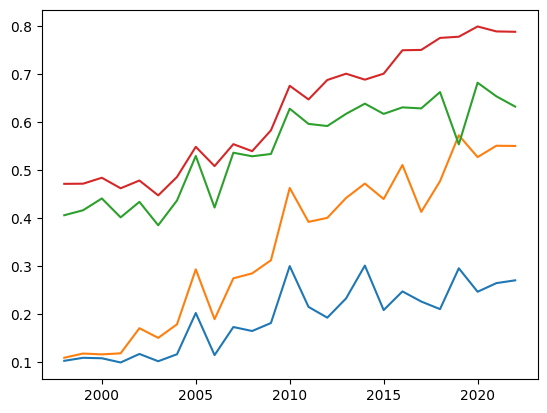

In [21]:
for i in range(1, 5):
    data = mydata.loc[mydata['age_group']==i]
    plt.plot(data['year'], data['myopia_rate'])
    

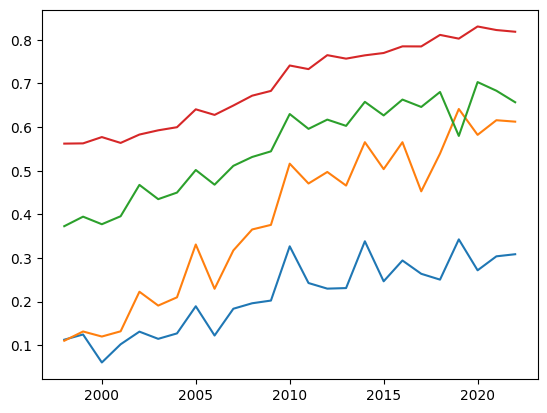

In [22]:
for i in range(1, 5):
    data = mydata.loc[mydata['age_group']==i]
    plt.plot(data['year'], data['myopia_rate_urban'])
    

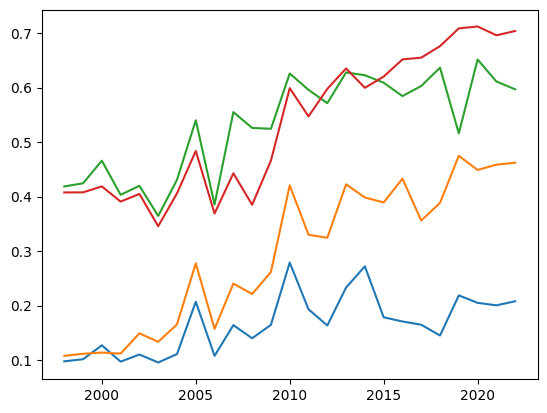

In [23]:
for i in range(1, 5):
    data = mydata.loc[mydata['age_group']==i]
    plt.plot(data['year'], data['myopia_rate_rural'])

### HDI分组

In [24]:
# HDI_data = pd.read_csv('./HDI.csv', usecols=lambda x: x != 'Unnamed: 0', index_col=0)
# HDI_data

In [25]:
# df_province['HDI'] = 0

# for index,row in df_province.iterrows():
#     pvc = row['province']
#     year = row['year']
#     ## 1999 :1998-2001; 2003: 2002-2005; 2008: 2006-2009; 2010:2010-2012; 2014: 2013-2016; 2017: 2017-2022
#     if year <= 2001:
#         year_index = 1999
#     elif year <= 2005:
#         year_index = 2003
#     elif year <= 2009:
#         year_index = 2008
#     elif year <= 2012:
#         year_index = 2010
#     elif year <= 2016:
#         year_index = 2014
#     else:
#         year_index = 2017
#     df_province.loc[index, 'HDI'] = HDI_data.loc[pvc, str(year_index)]

In [26]:
HDI_data = pd.read_csv('../HDI/kahdi.csv', usecols=lambda x: x != 'Unnamed: 0')
HDI_data

,province,hdi2010,hdistate
0,Beijing,0.825,high
1,Tianjin,0.786,high
2,Hebei,0.681,medium
3,Shanxi,0.689,medium
4,Inner Mongolia,0.712,high
5,Liaoning,0.730,high
6,Jilin,0.709,high
7,Heilongjiang,0.698,medium
8,Shanghai,0.804,high
9,Jiangsu,0.729,high


In [27]:
df_province = pd.merge(df_province, HDI_data, on='province')
df_province

,province,year,age_group,method,myopia_rate_urban,myopia_rate_rural,population_urban,weight,population_rural,rate,population,hdi2010,hdistate
0,Anhui,1998,1,NaN,0.088755,0.054200,1124729,0.267000,4092013.0,0.063426,5216742.0,0.645,low
1,Anhui,1999,1,NaN,0.084968,0.130392,1124729,0.276800,4092013.0,0.117819,5216742.0,0.645,low
2,Anhui,2000,1,1 or 3,0.064205,0.129624,1124729,0.279600,4092013.0,0.111333,5216742.0,0.645,low
3,Anhui,2001,1,NaN,0.084233,0.128975,1124729,0.293886,4092013.0,0.115825,5216742.0,0.645,low
4,Anhui,2002,1,NaN,0.105731,0.147738,1124729,0.308590,4092013.0,0.134775,5216742.0,0.645,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,Zhejiang,2018,4,1 or 3,0.851666,0.695790,2339204,0.700200,469946.0,0.804934,2809150.0,0.720,high
3096,Zhejiang,2019,4,1 or 3,0.862468,0.789092,2339204,0.715800,469946.0,0.841614,2809150.0,0.720,high
3097,Zhejiang,2020,4,1 or 3,0.896991,0.741244,2339204,0.721700,469946.0,0.853647,2809150.0,0.720,high
3098,Zhejiang,2021,4,NaN,0.875019,0.727354,2339204,0.726600,469946.0,0.834647,2809150.0,0.720,high


In [28]:
def HDI_grouping(hdi):
    if hdi >= 0.8:
        return 'very high'
    elif hdi >= 0.7:
        return 'high'
#     elif hdi >= 0.55:
#         return 'medium'
    else:
        return 'low and medium'

In [29]:
df_province['HDI_state'] = df_province['hdi2010'].apply(lambda x: HDI_grouping(x))
df_province.to_csv('./map_rate_3HDI.csv')
df_province

,province,year,age_group,method,myopia_rate_urban,myopia_rate_rural,population_urban,weight,population_rural,rate,population,hdi2010,hdistate,HDI_state
0,Anhui,1998,1,NaN,0.088755,0.054200,1124729,0.267000,4092013.0,0.063426,5216742.0,0.645,low,low and medium
1,Anhui,1999,1,NaN,0.084968,0.130392,1124729,0.276800,4092013.0,0.117819,5216742.0,0.645,low,low and medium
2,Anhui,2000,1,1 or 3,0.064205,0.129624,1124729,0.279600,4092013.0,0.111333,5216742.0,0.645,low,low and medium
3,Anhui,2001,1,NaN,0.084233,0.128975,1124729,0.293886,4092013.0,0.115825,5216742.0,0.645,low,low and medium
4,Anhui,2002,1,NaN,0.105731,0.147738,1124729,0.308590,4092013.0,0.134775,5216742.0,0.645,low,low and medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,Zhejiang,2018,4,1 or 3,0.851666,0.695790,2339204,0.700200,469946.0,0.804934,2809150.0,0.720,high,high
3096,Zhejiang,2019,4,1 or 3,0.862468,0.789092,2339204,0.715800,469946.0,0.841614,2809150.0,0.720,high,high
3097,Zhejiang,2020,4,1 or 3,0.896991,0.741244,2339204,0.721700,469946.0,0.853647,2809150.0,0.720,high,high
3098,Zhejiang,2021,4,NaN,0.875019,0.727354,2339204,0.726600,469946.0,0.834647,2809150.0,0.720,high,high


## 1999、2010、2017，不分年龄段

In [30]:
df_rate = df_province.groupby(['year', 'province', 'hdistate']).apply(region_weight)
map_rate = df_rate.to_frame()
map_rate[['rate']] = map_rate[0].apply(lambda x: pd.Series(x))
map_rate.drop(0, axis=1, inplace=True)
map_rate = map_rate.reset_index()
map_rate

/tmp/ipykernel_45681/1973329278.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = df_province.groupby(['year', 'province', 'hdistate']).apply(region_weight)


,year,province,hdistate,rate
0,1998,Anhui,low,0.265868
1,1998,Beijing,high,0.345863
2,1998,Chongqing,medium,0.239784
3,1998,Fujian,medium,0.295592
4,1998,Gansu,low,0.274176
...,...,...,...,...
770,2022,Tianjin,high,0.593694
771,2022,Tibet,low,0.478119
772,2022,Xinjiang,low,0.475155
773,2022,Yunnan,low,0.509024


In [31]:
# 1999 :1998-2001;2010:2010-2012;2017: 2017-2022

def year_weight(df):
    return df['rate'].mean()

df_1 = map_rate.loc[map_rate['year'] <= 2001, :]
df_2 = map_rate.loc[(map_rate['year'] <= 2012) & (map_rate['year'] >= 2010), :]
df_3 = map_rate.loc[(map_rate['year'] <= 2022) & (map_rate['year'] >= 2017), :]

for i in range(1, 4):
    variable_name = "df_" + str(i)
    my_df = globals()[variable_name]
    df_rate = my_df.groupby(['province', 'hdistate']).apply(year_weight)

    map_rate_ = df_rate.to_frame()
    map_rate_[['rate']] = map_rate_[0].apply(lambda x: pd.Series(x))
    map_rate_.drop(0, axis=1, inplace=True)
    map_rate_ = map_rate_.reset_index()
    map_rate_.to_csv('./rate_{}_by_3years_3HDI.csv'.format(i))


/tmp/ipykernel_45681/1709183589.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = my_df.groupby(['province', 'hdistate']).apply(year_weight)
/tmp/ipykernel_45681/1709183589.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = my_df.groupby(['province', 'hdistate']).apply(year_weight)
/tmp/ipykernel_45681/1709183589.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grou

### 不同HDI区段的、分年龄段、不分城乡的数据

In [32]:
df_rate = df_province.groupby(['year', 'hdistate', 'age_group']).apply(region_weight)
df_rate_hdi_age = df_rate.to_frame()
df_rate_hdi_age[['rate']] = df_rate_hdi_age[0].apply(lambda x: pd.Series(x))
df_rate_hdi_age.drop(0, axis=1, inplace=True)
df_rate_hdi_age = df_rate_hdi_age.reset_index()
df_rate_hdi_age

/tmp/ipykernel_45681/1876643579.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = df_province.groupby(['year', 'hdistate', 'age_group']).apply(region_weight)


,year,hdistate,age_group,rate
0,1998,high,1,0.119783
1,1998,high,2,0.110432
2,1998,high,3,0.389752
3,1998,high,4,0.485683
4,1998,low,1,0.086624
...,...,...,...,...
295,2022,low,4,0.761739
296,2022,medium,1,0.285394
297,2022,medium,2,0.572036
298,2022,medium,3,0.630377


In [33]:
mydata = df_rate_hdi_age.loc[:, ['year', 'hdistate', 'age_group', 'rate']]
mydata.to_csv('./rate_hdi_age.csv')

### 不同HDI区段的、不分年龄段、不分城乡的数据

In [34]:
df_rate = df_province.groupby(['year','hdistate', 'province']).apply(weighted_rate)
df_rate_hdi_province_u_r = df_rate.to_frame()
df_rate_hdi_province_u_r[['myopia_rate_urban', 'myopia_rate_rural', 'population_urban', 'population_rural', 'weight']] = df_rate_hdi_province_u_r[0].apply(lambda x: pd.Series(x))
df_rate_hdi_province_u_r.drop(0, axis=1, inplace=True)
df_rate_hdi_province_u_r = df_rate_hdi_province_u_r.reset_index()
df_rate_hdi_province_u_r['rate'] =  df_rate_hdi_province_u_r['myopia_rate_urban'] * df_rate_hdi_province_u_r['weight'] + df_rate_hdi_province_u_r['myopia_rate_rural'] * (1 - df_rate_hdi_province_u_r['weight'])
df_rate_hdi_province_u_r

/tmp/ipykernel_45681/3603321019.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = df_province.groupby(['year','hdistate', 'province']).apply(weighted_rate)


,year,hdistate,province,myopia_rate_urban,myopia_rate_rural,population_urban,population_rural,weight,rate
0,1998,high,Beijing,0.361354,0.261688,2490597.0,1020923.0,1.0000,0.361354
1,1998,high,Guangdong,0.297599,0.209192,14943284.0,16463320.0,0.5554,0.258293
2,1998,high,Inner Mongolia,0.302123,0.258144,3174341.0,4866848.0,0.4056,0.275982
3,1998,high,Jiangsu,0.363050,0.321496,8947272.0,14308673.0,0.3394,0.335599
4,1998,high,Jilin,0.234699,0.206313,3805663.0,4757433.0,0.4996,0.220495
...,...,...,...,...,...,...,...,...,...
770,2022,medium,Henan,0.629850,0.495543,17085683.0,14423770.0,0.5707,0.572192
771,2022,medium,Hubei,0.594486,0.443692,7889621.0,4206598.0,0.6467,0.541211
772,2022,medium,Hunan,0.574866,0.444765,10481870.0,7248809.0,0.6031,0.523229
773,2022,medium,Shaanxi,0.583766,0.471887,5587777.0,2911444.0,0.6402,0.543512


In [35]:
df_rate = df_province.groupby(['year', 'hdistate']).apply(region_weight)
df_rate_hdi_age = df_rate.to_frame()
df_rate_hdi_age[['rate']] = df_rate_hdi_age[0].apply(lambda x: pd.Series(x))
df_rate_hdi_age.drop(0, axis=1, inplace=True)
df_rate_hdi_age = df_rate_hdi_age.reset_index()
df_rate_hdi_age

/tmp/ipykernel_45681/3956070536.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_rate = df_province.groupby(['year', 'hdistate']).apply(region_weight)


,year,hdistate,rate
0,1998,high,0.285838
1,1998,low,0.255551
2,1998,medium,0.277147
3,1999,high,0.293644
4,1999,low,0.269014
...,...,...,...
70,2021,low,0.523834
71,2021,medium,0.561182
72,2022,high,0.563187
73,2022,low,0.526846


In [36]:
mydata = df_rate_hdi_age.loc[:, ['year', 'hdistate', 'rate']]
mydata.to_csv('./rate_hdi.csv')

## 绘图

#### 1、总的趋势图 四个年龄段在一个图里用不同颜色，rural一张urban一张

In [37]:
data_1 = pd.read_csv('./rate_country_age_urban_and_rural.csv')

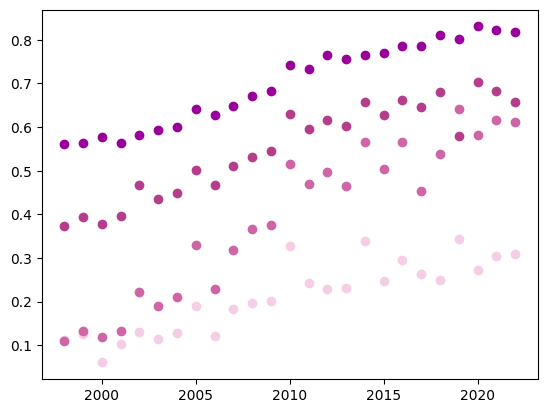

In [38]:
colors = ['#F5CEE6', '#CF64A6', '#B53E8C', '#990099']
# urban
for i in range(1, 5):
    data = data_1.loc[data_1['age_group']==i]
    plt.scatter(data['year'], data['myopia_rate_urban'], color = colors[i-1], label = 'Grade {}-{}'.format(i*3-2, i*3))
    
# plt.legend()
# plt.savefig('1_urban.jpg', format='jpg')
plt.show()

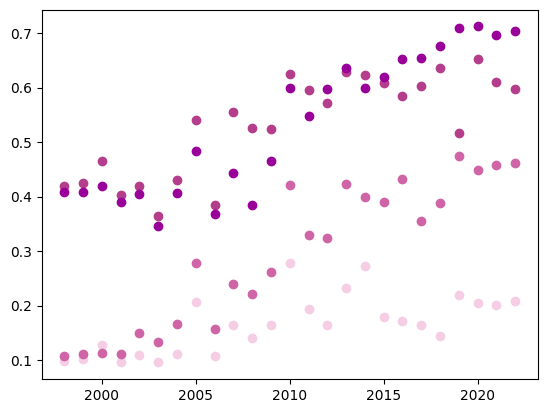

In [39]:
# rural
for i in range(1, 5):
    data = data_1.loc[data_1['age_group']==i]
    plt.scatter(data['year'], data['myopia_rate_rural'], color = colors[i-1], label = 'Grade {}-{}'.format(i*3-2, i*3))
    
# plt.legend()
plt.savefig('1_rural.jpg', format='jpg')
plt.show()

#### 2.城乡差距的图（四个年龄段分开，样式大致如下）

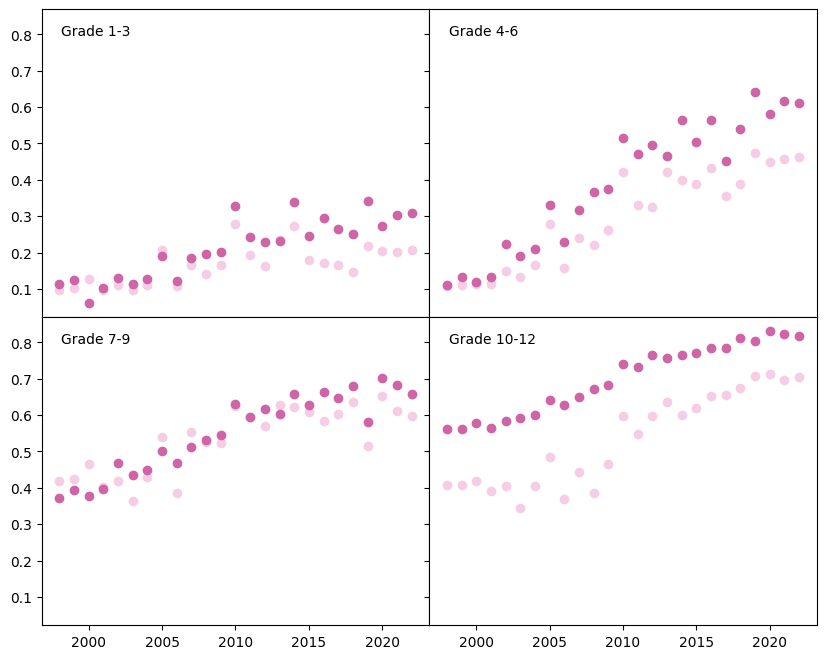

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)


for i, ax in enumerate(axs.flatten()):
    data = data_1.loc[data_1['age_group']==i+1]
    ax.scatter(data['year'], data['myopia_rate_rural'], color = '#F5CEE6')
    ax.scatter(data['year'], data['myopia_rate_urban'], color = '#CF64A6')
    ax.text(0.05, 0.95, 'Grade {}-{}'.format(i*3+1, i*3+3), transform=ax.transAxes, va='top', ha='left')


# 调整子图之间的间距
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('2_urban_rural.jpg', format='jpg')
plt.show()

#### 4、按HDI分四组（极高、高、中、低），不分城乡和年龄段

In [41]:
data_2 = pd.read_csv('./rate_hdi.csv', usecols=lambda x: x != 'Unnamed: 0')

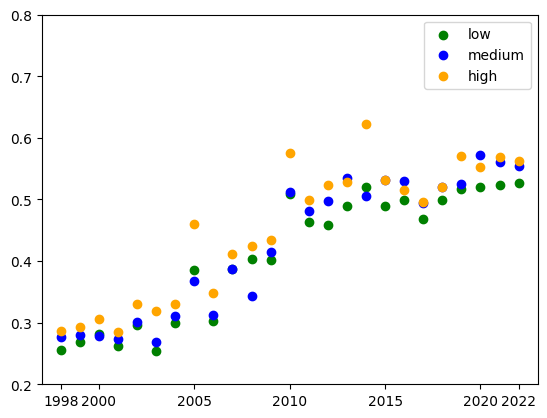

In [42]:
states = ['low', 'medium', 'high']
colors = ['g', 'b', 'orange', 'r']
i = 0
for s in states:
    data = data_2.loc[data_2['hdistate']==s]
    plt.scatter(data['year'], data['rate'], label = s, color = colors[i])
    i += 1

plt.ylim(0.2, 0.8)
plt.xlim(1997, 2023)
plt.xticks([1998, 2000, 2005, 2010, 2015, 2020, 2022])
plt.legend()
plt.savefig('3_HDI.pdf', format='pdf')
plt.show()

## 分HDI1999、2010、2017近视率均值

In [43]:
df_1999 = pd.read_csv('./rate_1_by_3years_3HDI.csv', usecols=lambda x: x != 'Unnamed: 0')
df_2010 = pd.read_csv('./rate_2_by_3years_3HDI.csv', usecols=lambda x: x != 'Unnamed: 0')
df_2017 = pd.read_csv('./rate_3_by_3years_3HDI.csv', usecols=lambda x: x != 'Unnamed: 0')

weight = pd.read_csv('../data/weight/weight_population.csv')
years = [1999, 2010, 2017]
    

In [44]:
def calculate_weighted_stats(df):
    # 计算加权均值
    weighted_mean = df.groupby('hdistate').apply(lambda x: np.average(x['rate'], weights=x['w']))

    # 计算加权标准差
    def weighted_std(x):
        weights = x['w']
        values = x['rate']
        mean = np.average(values, weights=weights)
        variance = np.average((values - mean) ** 2, weights=weights)
        return np.sqrt(variance)

    weighted_std = df.groupby('hdistate').apply(weighted_std)

    # 创建结果DataFrame
    result_df = pd.DataFrame({'Mean': weighted_mean, 'Std': weighted_std})

    return result_df

In [45]:
import statsmodels.api as sm
from scipy import stats

In [46]:
Mean_Std = pd.DataFrame()
weighted_anova_table = pd.DataFrame()
for y in years:
    variable_name = "df_" + str(y)
    my_df = globals()[variable_name]
    w = weight.loc[:, ['province', '{}'.format(y)]]
    df_rate = pd.merge(my_df, w, on = 'province')
    
    df_rate = df_rate.rename(columns={'{}'.format(y): 'w'})
    df_rate["weighted_value"] = df_rate["rate"] * df_rate["w"]
    mean_and_std = calculate_weighted_stats(df_rate)
#     mean_and_std.to_csv('./3years_3HDI/mean_and_std_{}.csv'.format(y))
    Mean_Std = pd.concat([Mean_Std, mean_and_std], axis=0) 
    model = sm.WLS.from_formula("rate ~ hdistate", data=df_rate, weights=df_rate["w"])
    result = model.fit()
    anova_table = sm.stats.anova_lm(result)
    weighted_anova_table = pd.concat([weighted_anova_table, anova_table], axis=0)
#     anova_table.to_csv('./3years_3HDI/weighted_anova_table_{}.csv'.format(y))


/tmp/ipykernel_45681/3258617625.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_mean = df.groupby('hdistate').apply(lambda x: np.average(x['rate'], weights=x['w']))
/tmp/ipykernel_45681/3258617625.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_std = df.groupby('hdistate').apply(weighted_std)
/tmp/ipykernel_45681/3258617625.py:3: DeprecationWarning: DataFrameGroupBy.apply operated

In [47]:
Mean_Std.to_csv('./Mean_Std_by_3years_3HDI.csv')
Mean_Std

,Mean,Std
hdistate,,
high,0.296394,0.044343
low,0.266727,0.028383
medium,0.276487,0.023129
high,0.533793,0.033667
low,0.475199,0.034232
medium,0.492116,0.038840
high,0.543894,0.048347
low,0.507804,0.045580
medium,0.536576,0.021592


In [48]:
weighted_anova_table.to_csv('./weighted_anova_lm_table_by_3years_3HDI.csv')
weighted_anova_table

,df,sum_sq,mean_sq,F,PR(>F)
hdistate,2.0,0.006462,0.003231,76.767979,4.312560e-12
Residual,28.0,0.001179,0.000042,NaN,NaN
hdistate,2.0,0.025498,0.012749,276.655966,3.618121e-19
Residual,28.0,0.001290,0.000046,NaN,NaN
hdistate,2.0,0.022032,0.011016,190.253786,5.051390e-17
Residual,28.0,0.001621,0.000058,NaN,NaN


In [49]:
import numpy as np

def weighted_anova(df, values_col, weights_col, group_col):

    values = df[values_col].values
    weights = df[weights_col].values
    groups = df[group_col].values

    # 计算每个组别的加权均值和权重总和
    group_means = np.zeros(len(np.unique(groups)))
    group_weights = np.zeros(len(np.unique(groups)))
    for i, group in enumerate(np.unique(groups)):
        group_indices = np.where(groups == group)[0]
        group_means[i] = np.average(values[group_indices], weights=weights[group_indices])
        group_weights[i] = np.sum(weights[group_indices])

    SSE = np.sum(weights * (values - np.average(values, weights=weights)) ** 2)
    SSA = np.sum(group_weights * (group_means - np.average(values, weights=weights)) ** 2)

    # 计算自由度
    df_within = len(values) - len(np.unique(groups))
    df_between = len(np.unique(groups)) - 1

    MSE = SSE / df_within
    MSA = SSA / df_between

    return MSE, MSA, df_between, df_within


In [50]:
def perform_anova(df):
    # MSE, MSA, df_between, df_within = weighted_anova(df, 'rate', 'w', 'HDI_state')
    MSE, MSA, df_between, df_within = weighted_anova(df, 'rate', 'w')

    F_value = MSA / MSE
    p_value = stats.f.sf(F_value, df_between, df_within)

    return F_value, p_value


In [51]:
# anova_table_ = pd.DataFrame()
# for y in years:
#    variable_name = "df_" + str(y)
#    my_df = globals()[variable_name]
#    w = weight.loc[:, ['province', '{}'.format(y)]]
#    df_rate = pd.merge(my_df, w, on = 'province')
#    df_rate = df_rate.rename(columns={'{}'.format(y): 'w'})
#    F_value, p_value = perform_anova(df_rate)
#    anova_table_.at[y, 'F_value'] = F_value
#    anova_table_.at[y, 'p_value'] = p_value
# anova_table_.to_csv('./weighted_anova_table_by_3years_3HDI.csv')
# anova_table_